In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

from keras.models import Sequential 
from keras.layers import Dense, Activation 


from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

2 Layers

In [28]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_9 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_9 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 80)                29200     
_________________________________________________________________
batch_normalization_10 (Batc (None, 80)                320       
_________________________________________________________________
dropout_10 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                810       
Total para

In [29]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.5568 - acc: 0.8326 - val_loss: 0.1769 - val_acc: 0.9444
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2668 - acc: 0.9217 - val_loss: 0.1293 - val_acc: 0.9592
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2066 - acc: 0.9394 - val_loss: 0.1076 - val_acc: 0.9659
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1762 - acc: 0.9473 - val_loss: 0.0936 - val_acc: 0.9715
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1520 - acc: 0.9543 - val_loss: 0.0861 - val_acc: 0.9743
Epoch 6/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1373 - acc: 0.9595 - val_loss: 0.0832 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.1272 - acc: 0.9623 - val_loss: 0.0784 - 

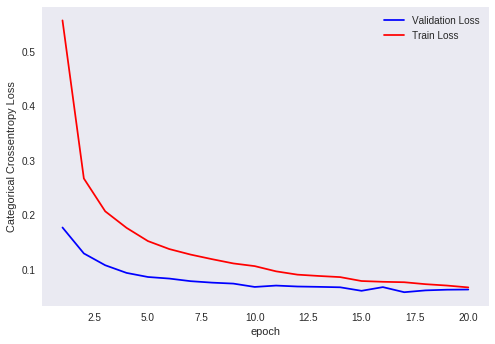

In [30]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


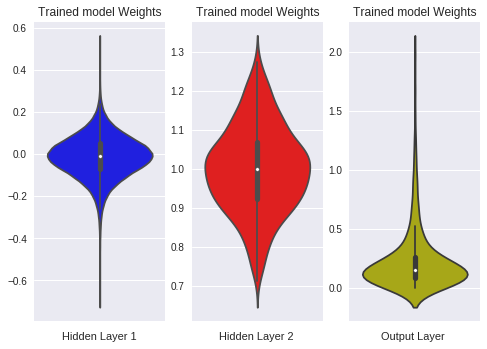

In [31]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

3 Layers

In [32]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
__________

In [34]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.6390 - acc: 0.8050 - val_loss: 0.1855 - val_acc: 0.9417
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.2754 - acc: 0.9183 - val_loss: 0.1281 - val_acc: 0.9615
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.2049 - acc: 0.9396 - val_loss: 0.1085 - val_acc: 0.9662
Epoch 4/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1734 - acc: 0.9488 - val_loss: 0.0939 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.1482 - acc: 0.9563 - val_loss: 0.0913 - val_acc: 0.9719
Epoch 6/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1360 - acc: 0.9596 - val_loss: 0.0815 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1189 - acc: 0.9641 - val_loss: 0.0791 

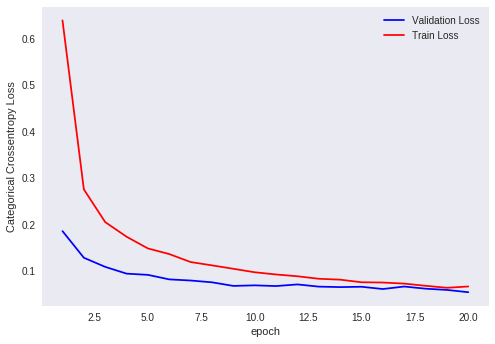

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


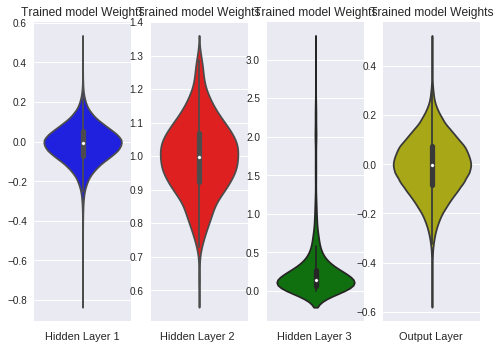

In [36]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

5 Layers

In [37]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
__________

In [38]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/step - loss: 1.7274 - acc: 0.4389 - val_loss: 0.4358 - val_acc: 0.8914
Epoch 2/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.7210 - acc: 0.7873 - val_loss: 0.2211 - val_acc: 0.9370
Epoch 3/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.4643 - acc: 0.8757 - val_loss: 0.1661 - val_acc: 0.9541
Epoch 4/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.3627 - acc: 0.9081 - val_loss: 0.1441 - val_acc: 0.9617
Epoch 5/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.3083 - acc: 0.9257 - val_loss: 0.1298 - val_acc: 0.9660
Epoch 6/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.2693 - acc: 0.9365 - val_loss: 0.1182 - val_acc: 0.9704
Epoch 7/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.2408 - acc: 0.9446 - val_loss: 0.

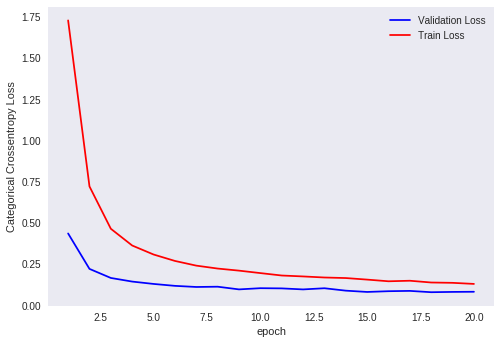

In [39]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


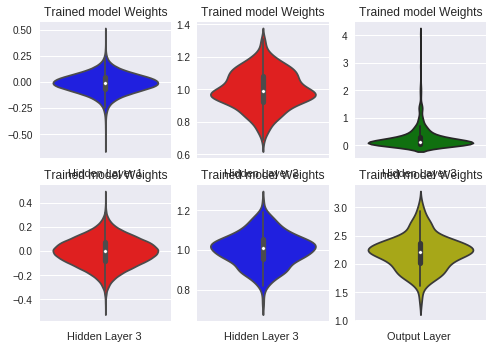

In [41]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()